<a href="https://colab.research.google.com/github/BradleyAgwa/Week-6-IP-Core/blob/main/Moringa_Data_Science_Core_W6_Independent_Project_2022_2_Bradley_Agwa_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MCHEZO PESA WEEK 6 IP**

## 1.0 Defining the Question

As a football analyst in a company - Mchezopesa Ltd, I have been tasked to accomplish the task below.

- Predicting the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (including rank in the training).

Working with two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

### Approach 1: Polynomial approach

What to train given:

Rank of home team
Rank of away team
Tournament type

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

### Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

## 1.1 Defining the metric of success

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly.

**Hypothesis 1**

Null hypothesis: Ho: The winning team didn't depend on who's home and who's away

Alternate hypothesis H1: The winning team depended on who's home and who's away

**Hypothesis 2**

Null hypothesis: Ho: The winning team didn't depend on whether the game was friendly

Alternate hypothesis H1: The winning team depended on whether the game was friendly

We should then prove our null hypotheses as true.

Working with a significance level set at alpha = 0.05



## 1.2 Business Understanding



1.   Business Needs- Mchezopesa is a company intreseted in football analysis and it wants to get a prediction between two teams that they have an interest with. 

2.   Data Science Objective- I need to build a model which predicts, with a high-level accuracy, the possible outcome(Win Draw or Lose) depending on who's home and who's away, and on whether or not the game is friendly. 




## 1.3 Recording the Experimental Design

- Reading the dataset into our environment.
- Tidying the data by checking for outliers, null values and duplicates and dealing with them. -Plotting univariate and bivariate summaries recording the observations.
- Implementing our solution by trying out different models and comparing to get the best model out of all approaches used.
- Before modelling, make sure to check for multicollinearity.
- Select the target and predictor variables necessary in modelling
- Split the dataset into train and test sets.
- Convert the categorical variables to numerical variables so as to be able to work with them in our models
- Perform regression (linear, polynomial) but maintain the data to be used for logistic approach.
- Check for residuals and also test for heteroskedasticity
- Compute the accuracy of the models
- Challenge the solution by trying to either add additional features or trying different models

## 1.4 Data Relevance

## 2.0 Data Understanding

### Importing Libraries

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import mean_squared_error , accuracy_score , confusion_matrix
from sklearn.model_selection import GridSearchCV , KFold , StratifiedKFold , cross_val_score
import warnings 
from sklearn.model_selection import KFold
import scipy as sp
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
# Loading the Fifa ranking dataset 

fifa = pd.read_csv('/content/fifa_ranking.csv')
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [3]:
# Checking the shape of our Fifa ranking dataset

fifa.shape

(57793, 16)

In [4]:
# Checking the information about our fifa dataset

fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

**Dataset kind** - The dataset has 57793 records and contains 16 fields 

In [5]:
# Loading the results dataset

results = pd.read_csv('/content/results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [6]:
# Checking the shape of the results dataset

results.shape

(40839, 9)

**Dataset kind** - The dataset has 40839 records and contains 9 fields 

In [7]:
# Checking the information about our results dataset

results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


**Main Features of both our data:**

- Rank
- Country Abbreviation
- Total Points
- Previous Points
- Rank Change
- Average Previous Years Points
- Average Previous Years Points Weighted (50%)
- Average 2 Years Ago Points
- Average 2 Years Ago Points Weighted (30%)
- Average 3 Years Ago Points
- Average 3 Years Ago Points Weighted (20%)
Confederation
- Date - date of the match
- Home_team - the name of the home team
- Away_team - the name of the away team
- Home_score - full-time home team score including extra time, not including penalty-shootouts
- Away_score - full-time away team score including extra time, not including penalty-shootouts
- Tournament - the name of the tournament
- City - the name of the city/town/administrative unit where the match was played
- Country - the name of the country where the match was played
- Neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue

### Further Checking our loaded data

#### Fifa dataset

In [8]:
# Checking if there are any missing values

fifa.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [9]:
# Checking for duplicates 

fifa.duplicated().sum()

37

While performing our merge we will deal with these duplicates

In [10]:
# Check the unique values in the confederations column

fifa['confederation'].unique()

array(['UEFA', 'CONMEBOL', 'CONCACAF', 'CAF', 'AFC', 'OFC'], dtype=object)

#### Results dataset

In [11]:
# Checking if there are any missing values

results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [12]:
# Checking if there are duplicated results by date

results['date'].duplicated().sum()

25724

In [13]:
# Checking the duplicated rows by date and home team

dup = results.duplicated(subset=['date','home_team'],keep='first')
dup

0        False
1        False
2        False
3        False
4        False
         ...  
40834    False
40835    False
40836    False
40837    False
40838    False
Length: 40839, dtype: bool

In [14]:
for item in dup:
  if item is True:
    print(item)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [15]:
# Printing the duplicated dataframe by date and home team

dup_1 = results[results[['date','home_team']].duplicated(keep='first')]
dup_1

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
76,1891-03-07,England,Northern Ireland,6,1,British Championship,Wolverhampton,England,False
670,1922-10-22,Brazil,Argentina,2,1,Copa Roca,São Paulo,Brazil,False
1811,1935-09-15,Germany,Poland,1,0,Friendly,Breslau,Germany,False
2014,1937-10-10,Poland,Latvia,2,1,Friendly,Katowice,Poland,False
2058,1938-03-20,Germany,Hungary,1,1,Friendly,Nuremberg,Germany,False
3016,1949-10-02,Sweden,Norway,3,3,Nordic Championship,Solna,Sweden,False
3126,1950-07-11,Madagascar,Mauritius,1,5,Friendly,Antananarivo,Madagascar,False
5434,1963-08-14,Sweden,Norway,0,0,Nordic Championship,Gothenburg,Sweden,False
6015,1965-11-21,Brazil,Hungary,5,3,Friendly,São Paulo,Brazil,False
6138,1966-06-08,Brazil,Peru,3,1,Friendly,Rio de Janeiro,Brazil,False


In [16]:
# Checking the duplicated dataframe by date and home team

dup_1.shape

(23, 9)

In [17]:
# Printing the duplicated dataframe by date, home team and away team

dup_2 = results[results[['date','home_team', 'away_team' ]].duplicated(keep='first')]
dup_2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
8880,1974-02-17,Tahiti,New Caledonia,1,2,Friendly,Papeete,French Polynesia,False
10300,1977-10-22,Guyana,Barbados,0,0,Friendly,Georgetown,Guyana,False
35243,2013-06-22,Monaco,Vatican City,2,0,Friendly,Cap-d'Ail,France,False


## 3.0 Data Cleaning

#### Cleaning the fifa ranking dataset first

In [18]:
# Previewing the columns for easy reference

fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [19]:
# The columns needed are; "rank"	"country_full"	"rank_date".
# The rest will be dropped

column_names = ['country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation']

fifa_df = fifa.drop(columns=column_names)
fifa_df.head(3)

,rank,country_full,rank_date
0,1,Germany,1993-08-08
1,2,Italy,1993-08-08
2,3,Switzerland,1993-08-08


In [20]:
# Checking the data type of our new dataframe

fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rank          57793 non-null  int64 
 1   country_full  57793 non-null  object
 2   rank_date     57793 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [21]:
# Changing the rank date column from object to datetime

fifa_df["rank_date"] = pd.to_datetime(fifa_df["rank_date"])
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   rank          57793 non-null  int64         
 1   country_full  57793 non-null  object        
 2   rank_date     57793 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ MB


In [22]:
# Creating a new column to capture the year for the rankings for easy sorting of the data by year column

fifa_df['year'] = fifa_df['rank_date'].dt.year

# Checking the final year of the ranking column data

fifa_df.tail(3)

,rank,country_full,rank_date,year
57790,206,Eritrea,2018-06-07,2018
57791,206,Somalia,2018-06-07,2018
57792,206,Tonga,2018-06-07,2018


#### Now to the results datasets

In [23]:
# Changing the date column to datetime from object
results["date"] = pd.to_datetime(results["date"])

In [24]:
# Getting the Year of the result rankings 

results['year'] = results['date'].dt.year
results.tail(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,2019
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,2019
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True,2019


Since in the fifa ranking data set captured till 2018 and this has captured till 2019, we will drop the 2019 records, as we are going to perform a merge of the two datasets.

In [25]:
# Droping the 2019 data on the results dataset
results_df = results[results.year < 2019]
results_df.tail(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
40349,2018-12-31,Philippines,Vietnam,2,4,Friendly,Doha,Qatar,True,2018
40350,2018-12-31,Qatar,Iran,1,2,Friendly,Doha,Qatar,False,2018


Using Fifa's prediction consideration criteria which is set to 4 years on their ranking system, data considered will be captured in 4 years i.e 2015 - 2018.

In [26]:
# Droping data in the results column that was captured prior to 2015
results_df1 = results_df[results_df['year'] > 2014]
results_df1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
36609,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015
36610,2015-01-04,Iran,Iraq,1,0,Friendly,Wollongong,Australia,True,2015
36611,2015-01-04,South Korea,Saudi Arabia,2,0,Friendly,Parramatta,Australia,True,2015
36612,2015-01-04,South Africa,Zambia,1,0,Friendly,Johannesburg,South Africa,False,2015
36613,2015-01-05,China PR,Oman,4,1,Friendly,Penrith,Australia,True,2015


#### Merging the two datasets

In [27]:
# Merging the results and ranking datasets 
# Starting with the home teams' ranking

merged_df = results_df1.merge(fifa_df, left_on=['home_team', 'year'], right_on=['country_full', 'year'], how='inner')
merged_df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,rank,country_full,rank_date
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,110,Bahrain,2015-01-08
1,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,103,Bahrain,2015-02-12
2,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,104,Bahrain,2015-03-12
3,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,108,Bahrain,2015-04-09
4,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,108,Bahrain,2015-05-07


In [28]:
# Checking the shape for the new dataframe

merged_df.shape

(34312, 13)

In [29]:
# Merging the results and ranking datasets 
# Then with the away teams' ranking

merged_df = merged_df.merge(fifa_df, left_on=['away_team', 'year'], right_on=['country_full', 'year'], how='inner')
merged_df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,rank_x,country_full_x,rank_date_x,rank_y,country_full_y,rank_date_y
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,110,Bahrain,2015-01-08,93,Jordan,2015-01-08
1,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,110,Bahrain,2015-01-08,97,Jordan,2015-02-12
2,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,110,Bahrain,2015-01-08,101,Jordan,2015-03-12
3,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,110,Bahrain,2015-01-08,103,Jordan,2015-04-09
4,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,110,Bahrain,2015-01-08,103,Jordan,2015-05-07


In [30]:
# Checking the shape of the fully merged dataframe.

merged_df.shape

(347880, 16)

In [31]:
# Running a null values check on it.

merged_df.isnull().sum()

date              0
home_team         0
away_team         0
home_score        0
away_score        0
tournament        0
city              0
country           0
neutral           0
year              0
rank_x            0
country_full_x    0
rank_date_x       0
rank_y            0
country_full_y    0
rank_date_y       0
dtype: int64

In [32]:
# Doing away with unneccesary columns and duplicated rankings for the same match.

df = merged_df.drop(columns=['city', 'country', 'neutral', 'year', 'country_full_x', 'country_full_y'])

df = df[df.rank_date_x == df.rank_date_y]
df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,rank_x,rank_date_x,rank_y,rank_date_y
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,110,2015-01-08,93,2015-01-08
13,2015-01-04,Bahrain,Jordan,1,0,Friendly,103,2015-02-12,97,2015-02-12
26,2015-01-04,Bahrain,Jordan,1,0,Friendly,104,2015-03-12,101,2015-03-12
39,2015-01-04,Bahrain,Jordan,1,0,Friendly,108,2015-04-09,103,2015-04-09
52,2015-01-04,Bahrain,Jordan,1,0,Friendly,108,2015-05-07,103,2015-05-07


In [33]:
# Checking duplicated rankings for the same match

df.duplicated(subset=['date','home_team','away_team','home_score','away_score','tournament']).sum()

28124

In [34]:
# Droping the duplicate rankings while retaining the first recordings

df.drop_duplicates(subset=['date','home_team','away_team','home_score','away_score','tournament'], keep= 'first', inplace= True)
df.shape

(2942, 10)

In [35]:
# Previewing our dataset

df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,rank_x,rank_date_x,rank_y,rank_date_y
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,110,2015-01-08,93,2015-01-08
144,2015-03-30,Saudi Arabia,Jordan,2,1,Friendly,102,2015-01-08,93,2015-01-08
288,2015-01-20,Japan,Jordan,2,0,AFC Asian Cup,54,2015-01-08,93,2015-01-08
432,2015-01-16,Palestine,Jordan,1,5,AFC Asian Cup,115,2015-01-08,93,2015-01-08
576,2015-09-08,Bangladesh,Jordan,0,4,FIFA World Cup qualification,165,2015-01-08,93,2015-01-08


In [36]:
# Dropping the dates columns because they are similar rank columns

df = df.drop(columns=['rank_date_x', 'rank_date_y'])

df.rename(columns={'rank_x':'home_team_rank', 'rank_y':'away_team_rank'},inplace=True)
df.head(2)

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,110,93
144,2015-03-30,Saudi Arabia,Jordan,2,1,Friendly,102,93


In [37]:
# Seting the tournament column to  categories of games
# The categories are (Friendlies, Regional Competitions,Confederations Cup, World Cup Qualifiers and The World Cup)

def Tournament_info(Match):
  if Match == Match == 'FIFA World Cup':
    return 1
  elif Match == 'FIFA World Cup qualification':
    return 2
  elif Match == 'Confederations Cup':
    return 3
  elif Match == 'Friendly':
    return 4
  else:
    return 5

# Applying the above function 
df['category'] = df['tournament'].apply(lambda x: Tournament_info(x))

# Previewing the category values

df['category'].unique()

array([4, 5, 2, 3, 1])

In [38]:
# Viewing the first 5 rows

df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,category
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,110,93,4
144,2015-03-30,Saudi Arabia,Jordan,2,1,Friendly,102,93,4
288,2015-01-20,Japan,Jordan,2,0,AFC Asian Cup,54,93,5
432,2015-01-16,Palestine,Jordan,1,5,AFC Asian Cup,115,93,5
576,2015-09-08,Bangladesh,Jordan,0,4,FIFA World Cup qualification,165,93,2


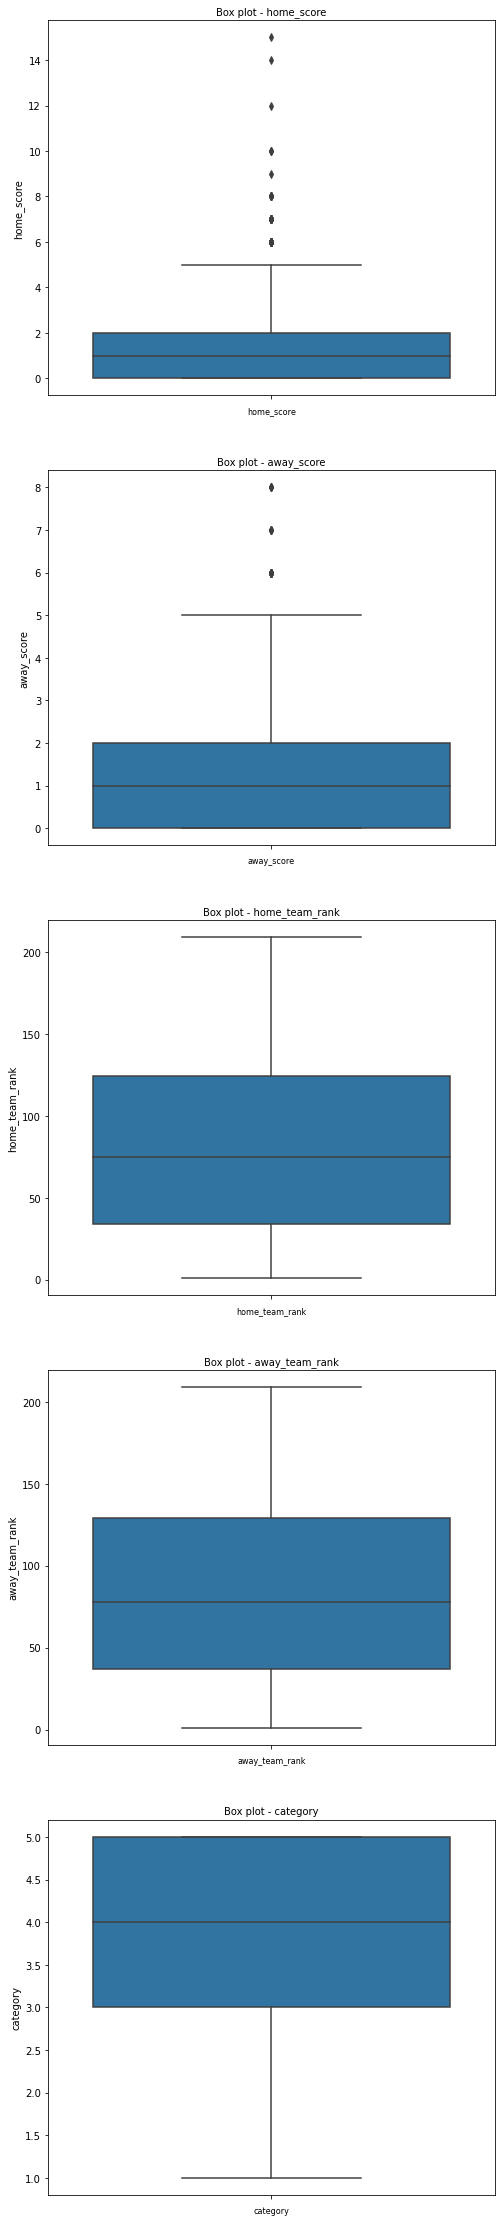

In [39]:
# Plotting columns with numerical values only to check for any outliers
col_names = ['home_score','away_score', 'home_team_rank', 'away_team_rank', 'category']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = df[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

The outliers will be retained as they are a representation of actual high score in matches.

## 4.0 Exploratory Data Analysis

In [40]:
# Getting the univariate describe summary

df.describe()

,home_score,away_score,home_team_rank,away_team_rank,category
count,2942.000000,2942.000000,2942.000000,2942.000000,2942.000000
mean,1.526852,1.041808,82.706322,85.820190,3.853501
std,1.515799,1.211115,56.652920,56.713522,1.208586
min,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,34.000000,37.000000,3.000000
50%,1.000000,1.000000,75.000000,78.000000,4.000000
75%,2.000000,2.000000,124.000000,129.000000,5.000000
max,15.000000,8.000000,209.000000,209.000000,5.000000


The count, mean, min(minimun) and max(maximum) rows are self-explanatory. The std shows the standard deviation, and the 25%, 50% and 75% rows show the corresponding percentiles.

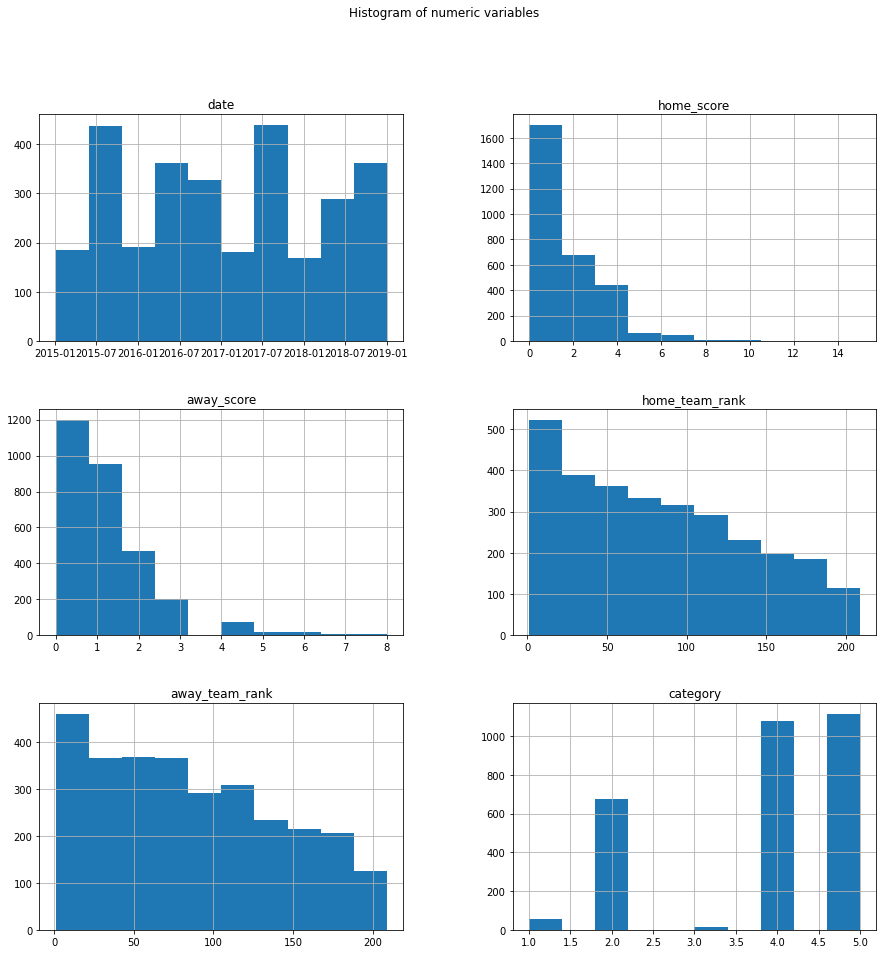

In [41]:
# Plotting the numerical variables on histogram to view their distributions.

df.hist(bins=10, figsize=(15,15))
plt.suptitle("Histogram of numeric variables")
plt.savefig('Fifa Histogram')
plt.show()

The variables form a normal distribution and are mostly skewed to the right.

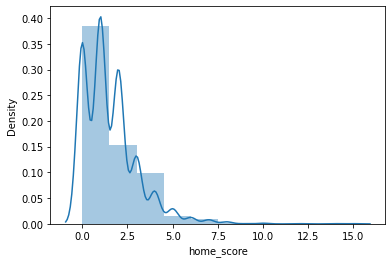

In [43]:
# Distribution plot for home scores

sns.distplot(df['home_score'], bins=10); 

The home team scores were mostly between 1 to 2 goals

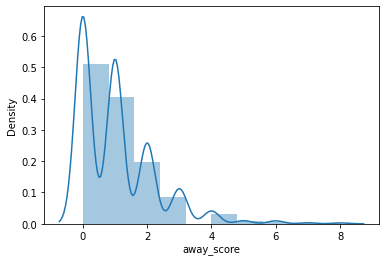

In [44]:
# Plotting another one for the away scores

sns.distplot(df['away_score'], bins=10); 

The away team scores were mostly between 0 to 1

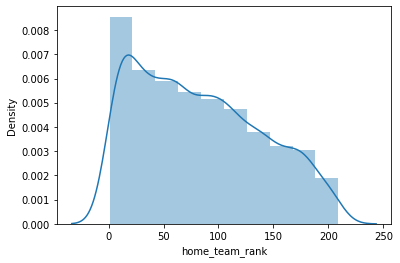

In [47]:
# Distribution plot for home team rank

sns.distplot(df['home_team_rank'], bins=10); 

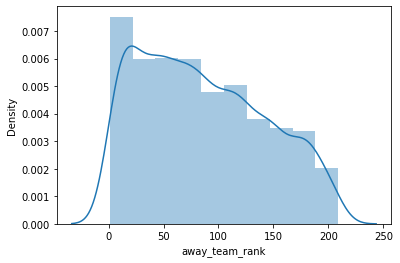

In [48]:
# Distribution plot for away team rank

sns.distplot(df['away_team_rank'], bins=10); 

In [49]:
# Checking the data distribution type by performing a normality test using the shapiro-wilk test

from scipy.stats import shapiro

data = df[['home_score', 'away_score', 'home_team_rank', 'away_team_rank', 'category']]

# Test for normality
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpreting the results
alpha = 0.05
if p > alpha: 
  print('Sample looks Guassian.')
else:
  print('Sample does not look Guassian.')


Statistics=0.688, p=0.000
Sample does not look Guassian.


In [50]:
# Checking the correlations using correlation Matrix

correlation=df.corr()
correlation   

,home_score,away_score,home_team_rank,away_team_rank,category
home_score,1.000000,-0.170362,-0.135260,0.256419,-0.035437
away_score,-0.170362,1.000000,0.196961,-0.170409,-0.042970
home_team_rank,-0.135260,0.196961,1.000000,0.535766,0.127638
away_team_rank,0.256419,-0.170409,0.535766,1.000000,0.152077
category,-0.035437,-0.042970,0.127638,0.152077,1.000000


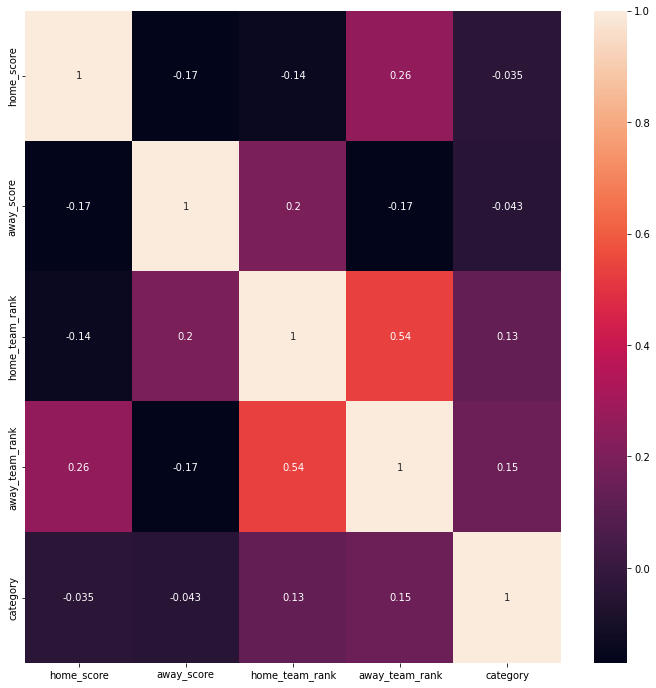

In [52]:
# Visualizing the correlation

plt.figure(figsize=(12, 12))  
sns.heatmap(correlation, annot = True); 

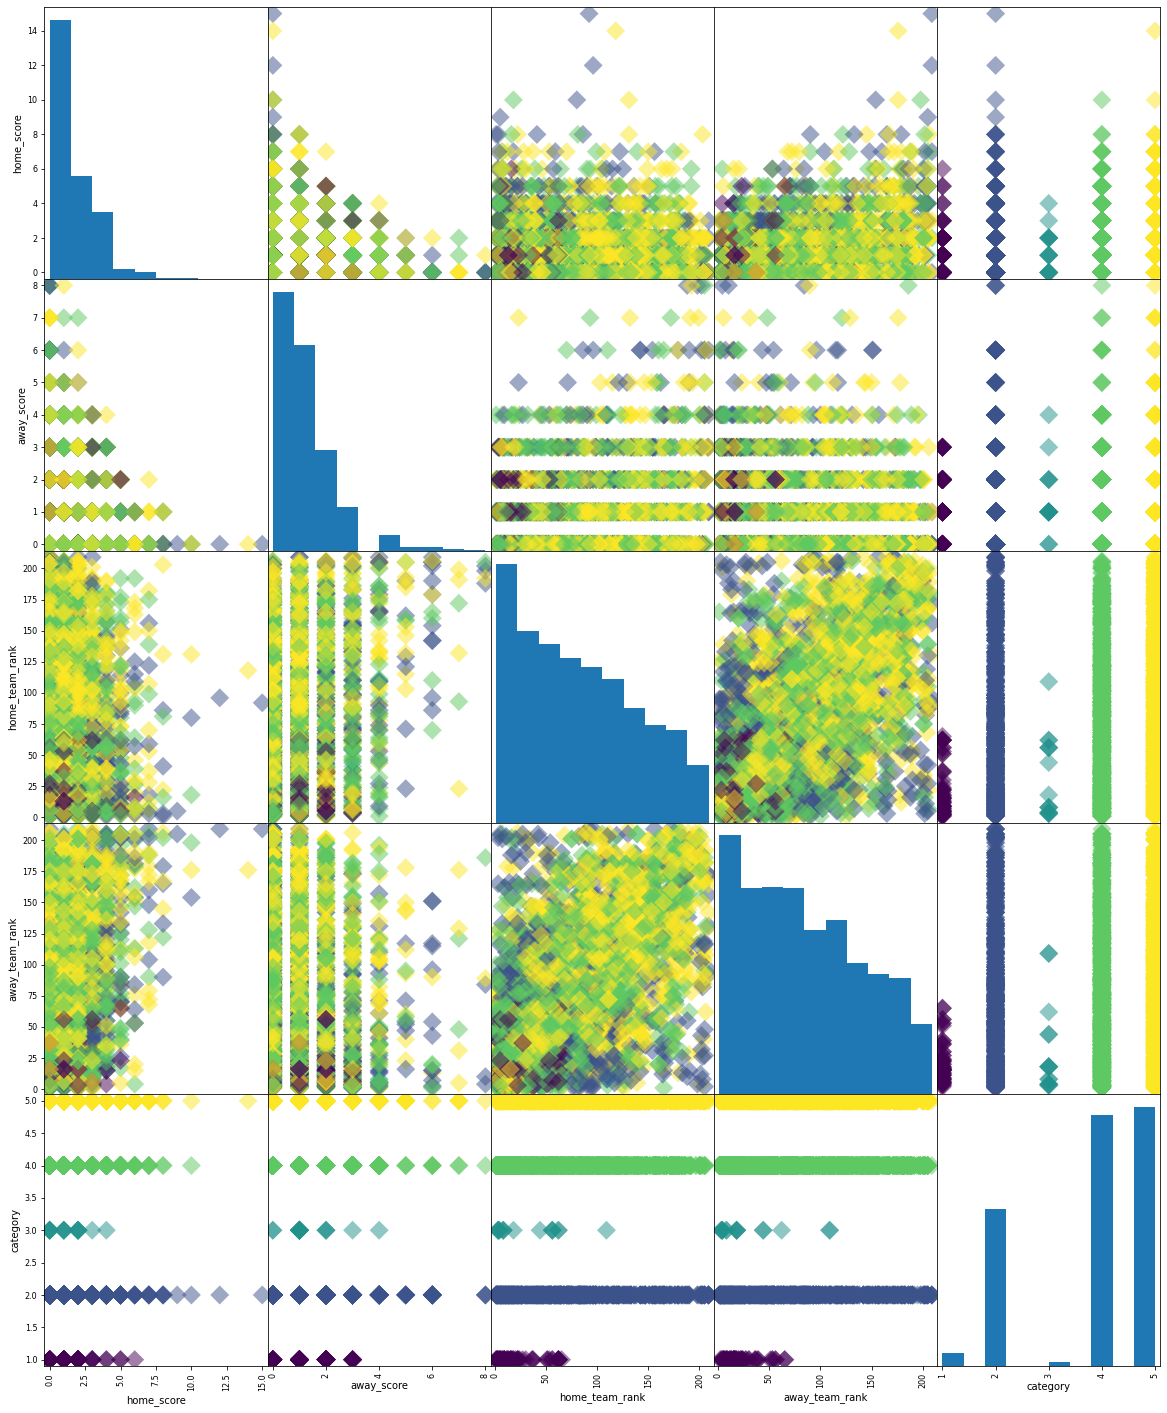

In [57]:
# Plotting a scatter matrix to display various bivariate relationships

y = df['category']
_ = pd.plotting.scatter_matrix(df, c = y, figsize=[20,25], s=180, marker='D')

In [62]:
# Most Played Tournament

tournament= df['tournament'].value_counts()
print(tournament)

Friendly                                1078
FIFA World Cup qualification             677
African Cup of Nations qualification     167
UEFA Euro qualification                  153
UEFA Nations League                      132
African Nations Championship             125
COSAFA Cup                                74
AFC Asian Cup qualification               66
FIFA World Cup                            58
Copa América                              52
UEFA Euro                                 51
African Cup of Nations                    45
AFF Championship                          40
CECAFA Cup                                37
Gold Cup                                  34
SAFF Cup                                  24
AFC Asian Cup                             19
CFU Caribbean Cup qualification           17
Confederations Cup                        16
Oceania Nations Cup                       15
EAFF Championship                         12
UNCAF Cup                                  8
AFC Challe

Friendly games were the most played, understandbly so as they usually take place over every international break during a footballing year.
Tournaments like the World cup and other such tournaments occur periodically for example the World Cup is played once every 4 years. So it makes sense for the numbers to be as they are.

## 5.0 Implementing The Solution

### 1st Approach: Polynomial Regression

#### 1st Model Build.

In [82]:
# First is to find correlation between the independent variables

df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'home_team_rank', 'away_team_rank', 'category'],
      dtype='object')

In [83]:
# Predict the number of goals scored by the away team having away_score as the dependent variable
# We'll drop columns that are irrelevant in predicting the goals scored by away team

independent_gs = df.drop(columns=['date', 'home_team', 'away_team', 'away_score', 'tournament'])
correlation_ag = independent_gs.corr()
correlation_ag

,home_score,home_team_rank,away_team_rank,category
home_score,1.000000,-0.135260,0.256419,-0.035437
home_team_rank,-0.135260,1.000000,0.535766,0.127638
away_team_rank,0.256419,0.535766,1.000000,0.152077
category,-0.035437,0.127638,0.152077,1.000000


Moving on, a model can now be built based on the independent variables.

In [84]:
# Secifying our x and y

X = independent_gs.values
y = df['away_score'].values

# Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Fit polynomial Regression to the dataset with a degree of 2

polynomial_regression = PolynomialFeatures(degree = 2) 
X_polynomial = polynomial_regression.fit_transform(X)

pol_regression = LinearRegression()
pol_regression.fit(X_polynomial, y)

y_pred = pol_regression.predict(polynomial_regression.fit_transform(X_test))

In [85]:
# Fit polynomial Regression to the dataset with a degree of 3

polynomial_regression_3 = PolynomialFeatures(degree = 3) 
X_polynomial_3 = polynomial_regression_3.fit_transform(X)

pol_regression_3 = LinearRegression()
pol_regression_3.fit(X_polynomial_3, y)

y_pred_3 = pol_regression_3.predict(polynomial_regression_3.fit_transform(X_test))

In [86]:
# Fit polynomial Regression to the dataset with a degree of 4

polynomial_regression_4 = PolynomialFeatures(degree = 4) 
X_polynomial_4 = polynomial_regression_4.fit_transform(X)

pol_regression_4 = LinearRegression()
pol_regression_4.fit(X_polynomial_4, y)

y_pred_4 = pol_regression_4.predict(polynomial_regression_4.fit_transform(X_test))

In [87]:
# Fit polynomial Regression to the dataset with a degree of 5

polynomial_regression_5 = PolynomialFeatures(degree = 5) 
X_polynomial_5 = polynomial_regression_5.fit_transform(X)

pol_regression_5 = LinearRegression()
pol_regression_5.fit(X_polynomial_5, y)

y_pred_5 = pol_regression_5.predict(polynomial_regression_5.fit_transform(X_test))

In [89]:
# Calculating the Root Mean Squared Error
import sklearn.metrics as metrics

print(f"The Root Mean Squared Error for the 2nd degree of freedom is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"The Root Mean Squared Error for the 3rd degree of freedom is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_3))}")
print(f"The Root Mean Squared Error for the 4th  degree of freedom is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_4))}")
print(f"The Root Mean Squared Error for the 5th degree of freedom is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_5))}")

The Root Mean Squared Error for the 2nd degree of freedom is: 1.0545113897038003
The Root Mean Squared Error for the 3rd degree of freedom is: 1.051229186541379
The Root Mean Squared Error for the 4th  degree of freedom is: 1.0496432857618494
The Root Mean Squared Error for the 5th degree of freedom is: 1.031713552847731


The 5th degree has the lowest RMSE so we will use it to avoid overfitting or underfitting.

#### Cross Validation for the 1st Model

In [92]:
# Our K-Fold cross validation value is k=10

folds = KFold(n_splits=10)
print(f"The number of folds used is: {folds.get_n_splits(X)}")

# Assign RMSE to an empty list, append the computed RMSES values of the 10 folds to the empty RMSES list
# and thereafter compute the avarage RMSES

RMSES = [] 

# Training Model 1

count = 1
for train_index, test_index in folds.split(X):
  print(f"\nTraining model {count}")
  
# Set up the train and test 
# With 10 folds, results in a model skill estimate with a low bias modest variance.
  X1_train, X1_test = X[train_index], X[test_index]
  y1_train, y1_test = y[train_index], y[test_index]
  
# Fitting the model 
  regressor = LinearRegression()  
  regressor.fit(X1_train, y1_train)
  
# Assess the accuraccy of the model

  y1_pred = regressor.predict(X1_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))
  RMSES.append(rmse_value)
  
  print(f"Model {count} Root Mean Squared Error is: {rmse_value}")
  count = count + 1

The number of folds used is: 10

Training model 1
Model 1 Root Mean Squared Error is: 1.182896320473104

Training model 2
Model 2 Root Mean Squared Error is: 1.0791242396938379

Training model 3
Model 3 Root Mean Squared Error is: 1.0865767464747271

Training model 4
Model 4 Root Mean Squared Error is: 0.9911818122143312

Training model 5
Model 5 Root Mean Squared Error is: 1.2061774005461487

Training model 6
Model 6 Root Mean Squared Error is: 1.1131300498983265

Training model 7
Model 7 Root Mean Squared Error is: 1.061245364488431

Training model 8
Model 8 Root Mean Squared Error is: 1.17634292100378

Training model 9
Model 9 Root Mean Squared Error is: 1.1602954086559631

Training model 10
Model 10 Root Mean Squared Error is: 1.126437481689346


In [93]:
# Average

print(f"The Average RMSES of the 10 folds is: {np.mean(RMSES)}")

The Average RMSES of the 10 folds is: 1.1183407745137997


From this, model 4 is seems more suitable for this fitting, because it has the least RMSE of 0.99, and is closest to the polynomial regression model with a degree 5 having a RMSE value of 1.03, which we earlier chose.

In [95]:
# Residuals for away score

residuals_ascore = np.subtract(y_pred_5, y_test)
pd.DataFrame(residuals_ascore).describe()

,0
count,589.000000
mean,-0.012536
std,1.032514
min,-4.057849
25%,-0.637037
50%,0.091604
75%,0.808583
max,3.241330


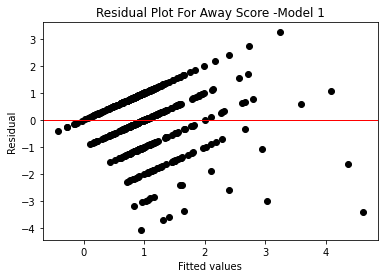

In [99]:
# Residual plot for our first model

plt.scatter(y_pred_5, residuals_ascore, color='black')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.title('Residual Plot For Away Score -Model 1')
plt.axhline(y= residuals_ascore.mean(), color='red', linewidth=1)
plt.show()

#### Critical Value for the 1st Model

In [101]:
# Using Bartlett's test. 
# The test establishes as a null hypothesis that the variance is the same for all datapoints
# and the H1 hypothesis that the variance is different for at least one pair of datapoints


test_result, p_value = sp.stats.bartlett(y_pred_5, residuals_ascore)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree = len(y_pred_5)-1
print(f"The degree of freedom is: {degree}")

# Probability
probability = 1 - p_value
print(f"The probability is: {probability}")

# Critical Value
critical_value = sp.stats.chi2.ppf(probability, degree)
print(f"The critical value is: {critical_value}")

if (test_result > critical_value):
  print("The variances are unequal! Reasses the Model!")
else:
  print("The variances are homogeneous. Fits consideration")

The degree of freedom is: 588
The probability is: 1.0
The critical value is: inf
The variances are homogeneous. Fits consideration


In [104]:
X = independent_gs.values
y = df['away_score'].values

X_train, X_test, away_score_train, away_score_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, away_score_train)

# This is our prediction for admission based on our model

away_sp = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(away_sp, away_score_test)

# Let's describe our residual:

pd.DataFrame(residuals).describe()

residuals.mean()

-0.026754068505827504

The residual mean of -0.0268 which close to 0, meaning our prediction is reasonably correct. 

#### 2nd Model Build

In [105]:
# Predicting how many goals the home team scores having dependent variable as home_score
# We'll drop columns that are irrelevant in predicting the goals scored by home team

independent_hgs = df.drop(columns=['date', 'home_team', 'away_team', 'home_score', 'tournament'])
correlations_hgs = independent_hgs.corr()
correlations_hgs 

,away_score,home_team_rank,away_team_rank,category
away_score,1.000000,0.196961,-0.170409,-0.042970
home_team_rank,0.196961,1.000000,0.535766,0.127638
away_team_rank,-0.170409,0.535766,1.000000,0.152077
category,-0.042970,0.127638,0.152077,1.000000


The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to each of the same.

In [106]:
# Calculating VIF Score for each Independent Variable
# Create a new dataframe with the inverse of the matrix above correlations

pd.DataFrame(np.linalg.inv(correlations_hgs.values), index = correlations_hgs.index, columns=correlations_hgs.columns)

,away_score,home_team_rank,away_team_rank,category
away_score,1.172193,-0.476723,0.448626,0.042992
home_team_rank,-0.476723,1.600797,-0.926121,-0.083965
away_team_rank,0.448626,-0.926121,1.588462,-0.104083
category,0.042992,-0.083965,-0.104083,1.028393


The VIF score for each variable is below 5. A rule of thumb is if a VIF is > 10, there's high multicollinearity among the variables. With values being close to 1 , we are in good shape, and can proceed with the regression.

Moving on, the second model can now be built.

In [111]:
X1 = independent_hgs.values
y1 = df['home_score'].values

# Split the dataset into train and test sets

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.2, random_state=0)

# Fitting polynomial Regression to the dataset with a degree of 2

polynomial_regression_1 = PolynomialFeatures(degree = 2) 
X1_polynomial = polynomial_regression_1.fit_transform(X1)

pol_regression_1 = LinearRegression()
pol_regression_1.fit(X1_polynomial, y1)

y1_pred = pol_regression_1.predict(polynomial_regression_1.fit_transform(X1_test))

In [112]:
# Fitting polynomial Regression to the dataset with a degree of 3

polynomial_regression_3 = PolynomialFeatures(degree = 3) 
X1_polynomial_3 = polynomial_regression_3.fit_transform(X1)

pol_regression_3 = LinearRegression()
pol_regression_3.fit(X1_polynomial_3, y1)

y1_pred_3 = pol_regression_3.predict(polynomial_regression_3.fit_transform(X1_test))

In [115]:
# Fitting polynomial Regression to the dataset with a degree of 4

polynomial_regression_4 = PolynomialFeatures(degree = 4) 
X1_polynomial_4 = polynomial_regression_4.fit_transform(X1)

pol_regression_4 = LinearRegression()
pol_regression_4.fit(X1_polynomial_4, y1)

y1_pred_4 = pol_regression_4.predict(polynomial_regression_4.fit_transform(X1_test))

In [116]:
# Fitting polynomial Regression to the dataset with a degree of 5

polynomial_regression_5 = PolynomialFeatures(degree = 5) 
X1_polynomial_5 = polynomial_regression_5.fit_transform(X1)

pol_regression_5 = LinearRegression()
pol_regression_5.fit(X1_polynomial_5, y1)

y1_pred_5 = pol_regression_5.predict(polynomial_regression_5.fit_transform(X1_test))

In [117]:
# Calculating the Root Mean Squared Error

print(f"The Root Mean Squared Error for the 2nd degree of freedom is: {np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))}")
print(f"The Root Mean Squared Error for the 3rd degree of freedom is: {np.sqrt(metrics.mean_squared_error(y1_test, y1_pred_3))}")
print(f"The Root Mean Squared Error for the 4th  degree of freedom is: {np.sqrt(metrics.mean_squared_error(y1_test, y1_pred_4))}")
print(f"The Root Mean Squared Error for the 5th degree of freedom is: {np.sqrt(metrics.mean_squared_error(y1_test, y1_pred_5))}")

The Root Mean Squared Error for the 2nd degree of freedom is: 1.398268340981217
The Root Mean Squared Error for the 3rd degree of freedom is: 1.371583467496873
The Root Mean Squared Error for the 4th  degree of freedom is: 1.350048108566076
The Root Mean Squared Error for the 5th degree of freedom is: 1.3194798591724024


We will go with the 5th degree as it has the lowest RMSE value.

#### Cross Validation for the 2nd Model

In [118]:
# We will use the K-Fold cross validation with a value of k=10
folds1 = KFold(n_splits=10)
print(f"The number of folds used is: {str(folds.get_n_splits(X1))}")

# Assign RMSE to an empty list 
# then we will append the computed RMSES values of the 10 folds to the empty RMSES list
# and thereafter compute the avarage RMSES
RMSES_2 = [] 

# Training Model 1
count = 1
for train_index, test_index in folds.split(X1):
  print(f"\nTraining model {count}")
  
  # Set up the train and test 
  # With 10 folds, results in a model skill estimate with a low bias modest variance.
  X3_train, X3_test = X1[train_index], X1[test_index]
  y3_train, y3_test = y1[train_index], y1[test_index]
  
  # Fitting the model 
  regressor = LinearRegression()  
  regressor.fit(X3_train, y3_train)
  
  # Assess the accuraccy of the model
  y3_pred = regressor.predict(X3_test)
  
  rmse_value_2 =  np.sqrt(metrics.mean_squared_error(y3_test, y3_pred))
  RMSES_2.append(rmse_value_2)
  
  print(f"Model {count} Root Mean Squared Error is: {rmse_value_2}")
  count = count + 1

The number of folds used is: 10

Training model 1
Model 1 Root Mean Squared Error is: 1.60984125854493

Training model 2
Model 2 Root Mean Squared Error is: 1.2334372685762063

Training model 3
Model 3 Root Mean Squared Error is: 1.415647747430358

Training model 4
Model 4 Root Mean Squared Error is: 1.3409814907836255

Training model 5
Model 5 Root Mean Squared Error is: 1.2086987223644603

Training model 6
Model 6 Root Mean Squared Error is: 1.355465462523417

Training model 7
Model 7 Root Mean Squared Error is: 1.3257190002208024

Training model 8
Model 8 Root Mean Squared Error is: 1.60923046219106

Training model 9
Model 9 Root Mean Squared Error is: 1.3515323458299187

Training model 10
Model 10 Root Mean Squared Error is: 1.2882300542072325


In [119]:
# Calculating the average for the 2nd Model.

print(f"The Average Value of the RMSES for Model 2 is: {np.mean(RMSES_2)}")

The Average Value of the RMSES for Model 2 is: 1.3738783812672009


The RMSE average of the 2nd Model is a bit higher than that of Model 1 which was 1.1183. Picking a training model from this build, then that will be training model 5 with RMSE of 1.21 which is higher than the lowest RMSE from Model 1. Interestingly, it is worth noting that it will make more sense to pick training model 4 from the 1st Model instead, as it has the least RMSE of 0.99, and is closee to the polynomial regression model with a degree of freedom of 5 having a RMSE value of 1.03.

#### Critical Value for the 2nd Model

In [120]:
# Residuals for Home Score

residuals_hs = np.subtract(y1_pred_5, y1_test)
pd.DataFrame(residuals_hs).describe()

,0
count,589.000000
mean,-0.055628
std,1.319427
min,-8.569666
25%,-0.735698
50%,0.096841
75%,0.764237
max,3.217385


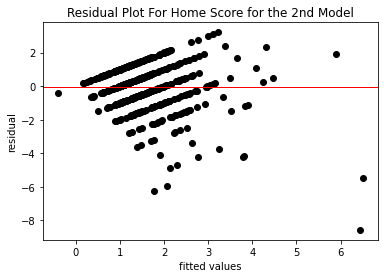

In [121]:
# Residual plot for the 2nd Model

plt.scatter(y1_pred_5, residuals_hs, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.title('Residual Plot For Home Score for the 2nd Model')
plt.axhline(y= residuals_hs.mean(), color='red', linewidth=1)
plt.show()

In [122]:
# Using Bartlett's test. 

test_result_1, p_value_1 = sp.stats.bartlett(y1_pred_5, residuals_hs)

# To interpret the results we must also compute a critical value of the chi squared distribution
# The degree of Freedom
degree1 = len(y1_pred_5)-1
print(f"The degree of freedom is: {degree1}")

# Probability
probability_1 = 1 - p_value_1
print(f"The probability for 2nd Model is: {probability_1}")

# Critical value
critical_value_1 = sp.stats.chi2.ppf(probability_1, degree1)
print(f"The critical value is: {critical_value_1}")

if (test_result_1 > critical_value_1):
  print("The variances are unequal! Reasses the Model!")
else:
  print("The variances are homogeneous. Fits consideration")

The degree of freedom is: 588
The probability for 2nd Model is: 1.0
The critical value is: inf
The variances are homogeneous. Fits consideration


### 2nd Approach: Logistic Regression

#### Feature Engineering

In [123]:
# Previewing the dataset
logic_df = df.copy(deep=True)
logic_df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,category
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,110,93,4
144,2015-03-30,Saudi Arabia,Jordan,2,1,Friendly,102,93,4
288,2015-01-20,Japan,Jordan,2,0,AFC Asian Cup,54,93,5
432,2015-01-16,Palestine,Jordan,1,5,AFC Asian Cup,115,93,5
576,2015-09-08,Bangladesh,Jordan,0,4,FIFA World Cup qualification,165,93,2


In [125]:
# Determining if a team will win, draw or lose by creating a new [result] column 

def match_result(row):
  if row['home_score'] > row['away_score']:
    result = 'Win'
  elif row['home_score'] < row['away_score']:
    result = 'Lose'
  else:
    result = 'Draw'
  return result

logic_df['result'] = logic_df.apply(match_result, axis=1)
logic_df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,category,result
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,110,93,4,Win
144,2015-03-30,Saudi Arabia,Jordan,2,1,Friendly,102,93,4,Win
288,2015-01-20,Japan,Jordan,2,0,AFC Asian Cup,54,93,5,Win
432,2015-01-16,Palestine,Jordan,1,5,AFC Asian Cup,115,93,5,Lose
576,2015-09-08,Bangladesh,Jordan,0,4,FIFA World Cup qualification,165,93,2,Lose


In [126]:
# Label encoding the results column

labelencoder = LabelEncoder()
logic_df['result'] = labelencoder.fit_transform(logic_df['result'])
logic_df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,category,result
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,110,93,4,2
144,2015-03-30,Saudi Arabia,Jordan,2,1,Friendly,102,93,4,2
288,2015-01-20,Japan,Jordan,2,0,AFC Asian Cup,54,93,5,2
432,2015-01-16,Palestine,Jordan,1,5,AFC Asian Cup,115,93,5,1
576,2015-09-08,Bangladesh,Jordan,0,4,FIFA World Cup qualification,165,93,2,1


In [127]:
# A feature and labels for the data

X=logic_df[['home_score', 'away_score']]
y=logic_df['result']

In [128]:
# Fitting the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=25)

In [129]:
LogReg = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
LogReg.fit(X_train, y_train)

# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [130]:
# Evaluation the model

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[151,   0,   0],
       [  0, 179,   0],
       [  0,   0, 259]])

We get true values of: 151, 179, 259.

##### Using K Nearest Neighbor Algorithm for prediction

In [134]:
# Fitting the model

KNN = KNeighborsClassifier(n_neighbors = 1)
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [135]:
# Predictions
# Using 2: Win, 1: Lose, 0: Draw

pred1=np.array([[1,10]])
pred2=np.array([[4,0]])

prediction_1 = KNN.predict(pred1)
print(f"The prediction is: {prediction_1}")
prediction_2 = KNN.predict(pred2)
print(f"The prediction is: {prediction_2}")

The prediction is: [1]
The prediction is: [2]


In [136]:
# Prediction's Probability

X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X, y)
KNeighborsClassifier(...)
print(neigh.predict([[1.1]]))

print(neigh.predict_proba([[0.9]]))


[0]
[[1. 0.]]


In [137]:
# Testing the accuracy of the model

prediction = KNN.score(X_test, y_test)
prediction

1.0

In [138]:
accuracy_score(y_test,y_pred)

1.0

## 6.0 Conclusion

We get an accuracy score of 100% which seems overstating, meaning our model needs to be reassesed and further improvements can be made for a more realistic prediction, since something like a football match has a lot of factors influencing the results for one to make a prediction that is 100% correct.

####  Challenging the Solution

A football match has a lot of factors that can affect it's outcome, like weather, team form, average age of a team, number of times a team has participated in a certain competition, etc. it would be best if such factors could be used to build future models in order to come up with a more accurate prediction.

#### Follow up questions

Did we have the right data?

Yes. though the prediction score was at 100%, this can be solved using different models

Do we need other data to answer our question?

Probably more data needs to be sought so as to improve the model and provide meaningful predictions.

Did we have the right question?

Yes.